Text(0.5, 1.0, 'RPM over entire run')

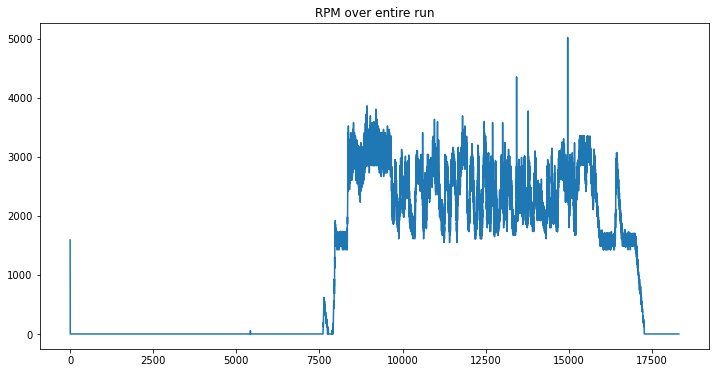

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal
import math

file_path = 'Data\Ella_Error_run1.TXT'

properties = ["status", "rpm", "act_vel", "enc_pos", "full_in", "full_out", "control_start", "control_stop", "odrive_voltage", "odrive_current", "cooling_temp"]

data_log = np.loadtxt(file_path, dtype=float, delimiter=', ', skiprows=4, ndmin=2)

y = data_log[:,1] #engine rpm

x = np.arange(len(y))
plt.figure(figsize = (12, 6))
plt.plot(x, y)
plt.title("RPM over entire run")

Text(0.5, 1.0, 'RPM cropped')

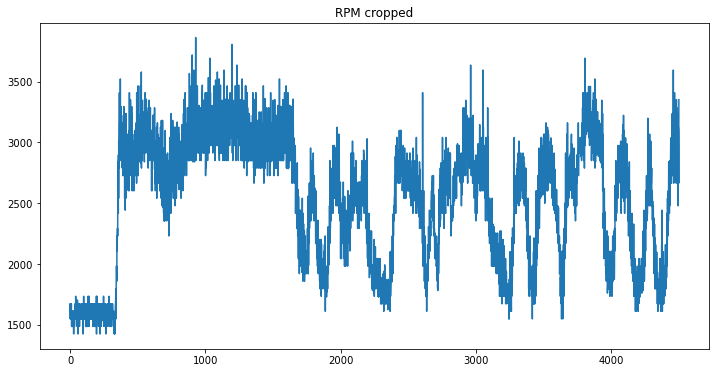

In [71]:
y_trim = y[8000:12500] #trim
x = np.arange(len(y_trim))
plt.figure(figsize = (12, 6))
plt.plot(x, y_trim)
plt.title("RPM cropped")


Text(0, 0.5, 'Magnitude')

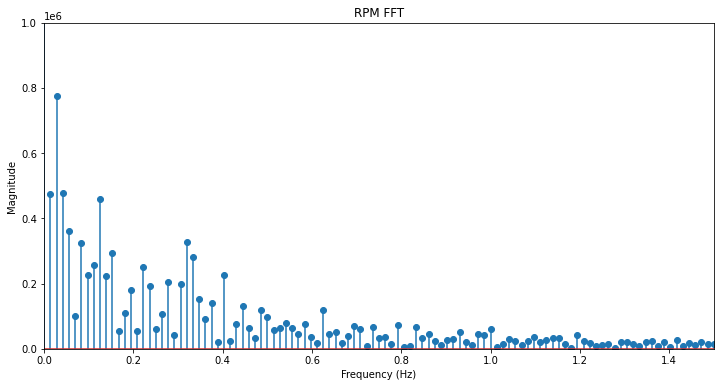

In [72]:
Y = scipy.fft.fft(y_trim)
N = len(Y)
sr = 1000/16 #sample rate in Hz
freq = np.arange(N) * sr/N
plt.figure(figsize = (12, 6))
plt.stem(freq, np.abs(Y))
plt.title("RPM FFT")
plt.ylim(0, 0.1e7)
plt.xlim(0, 1.5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

Text(0.5, 1.0, 'RPM Butterworth filtered')

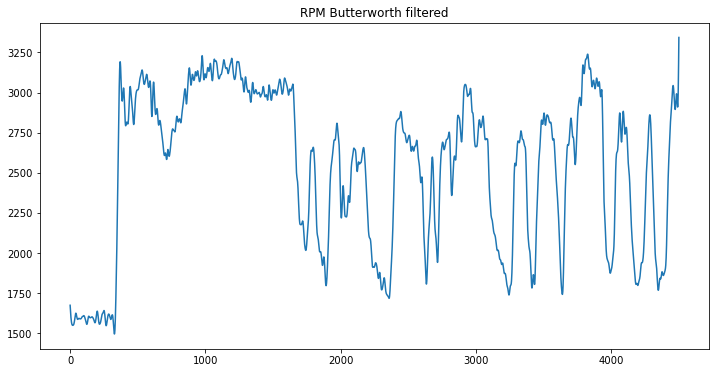

In [87]:
b, a = signal.butter(4, .1, 'low')  #4th order, cutoff is .1 rad/s
y_butter = signal.filtfilt(b, a, y_trim)
plt.figure(figsize = (12, 6))
plt.plot(x, y_butter)
plt.title("RPM Butterworth filtered")

Text(0, 0.5, 'Magnitude')

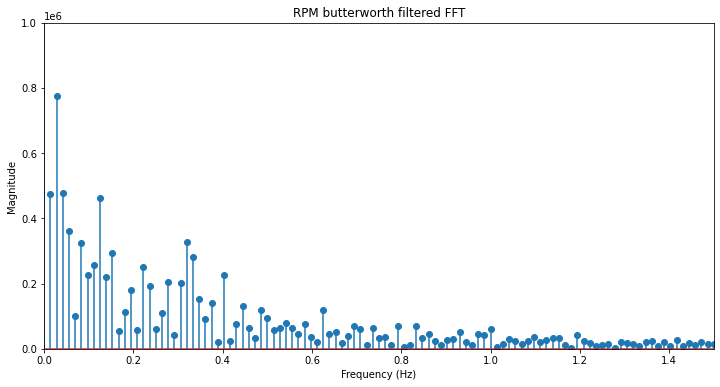

In [88]:
Y = scipy.fft.fft(y_butter)
N = len(Y)
sr = 1000/16 #sample rate in Hz
freq = np.arange(N) * sr/N
plt.figure(figsize = (12, 6))
plt.stem(freq, np.abs(Y))
plt.title("RPM butterworth filtered FFT")
plt.ylim(0, 0.1e7)
plt.xlim(0, 1.5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

Text(0.5, 1.0, 'RPM exponential filtered, alpha = 0.1')

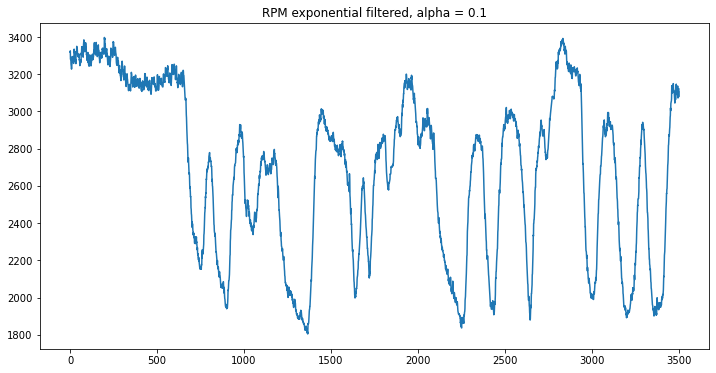

In [89]:
exp_func = np.arange(1000.0)
exp_filt_alpha = 0.1
for i in exp_func:
    exp_func[int(i)] = math.exp(-exp_filt_alpha * i)
y_exp_filt = signal.convolve(y_trim, exp_func, mode = "valid")
plt.figure(figsize = (12, 6))
#plt.plot(np.arange(len(exp_func)), exp_func) #debugging
plt.plot(np.arange(len(y_exp_filt)), y_exp_filt/10)
plt.title('RPM exponential filtered, alpha = ' + str(exp_filt_alpha) )
#plt.ylim(bottom = 1400)


In [ ]:
Y = scipy.fft.fft(y_exp_filt)
N = len(Y)
sr = 1000/16 #sample rate in Hz
freq = np.arange(N) * sr/N
plt.figure(figsize = (12, 6))
plt.stem(freq, np.abs(Y))
plt.title("RPM exp filtered FFT")
plt.ylim(0, 0.1e7)
plt.xlim(0, 1.5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')